In [1]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#load sklearn libraries
from sklearn import preprocessing
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.ensemble import (GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier) 
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
import xgboost as xgb
from mlxtend.classifier import (EnsembleVoteClassifier, StackingClassifier)

In [3]:
import os
base = os.getcwd()+os.sep

In [123]:
df=pd.read_csv(base + "X_train.txt",delimiter=",")

In [124]:
df_1=pd.read_csv(base + "Y_train.txt",delimiter=" ")

In [125]:
df['capital.loss']=df['capital.loss']*(-1)

In [273]:
#Detect nulti-collinearity
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features
df.drop(df[to_drop], axis=1, inplace = True)

In [126]:
df_concat = pd.concat([df, df_1],axis=1)

In [127]:
#df_X = pd.get_dummies(df,drop_first=True)
df_X = pd.get_dummies(df_concat,drop_first=True)

In [97]:
#pandas_profiling.ProfileReport(df_X)

In [128]:
df_new=df_X.drop_duplicates()

In [129]:
df_new = df_new[(df_new.T != 0).any()]

In [130]:
df_new.shape

(18284, 95)

In [131]:
#threshold = 0.1
#df_new=df_new.drop(df_new.std()[df_new.std() < threshold].index.values, axis=1)

In [132]:
df_Y = df_new.filter(['>50K'], axis=1)

In [133]:
df_X1 = df_new.drop(['>50K'], axis=1)

In [252]:
#df_new=df_X[['marital.status_Married-civ-spouse', 'marital.status_Never-married', 'relationship_Own-child', 'relationship_Not-in-family', 'sex_Male', 'education.num', 'occupation_Exec-managerial', 'age', 'relationship_Unmarried', 'occupation_Other-service', 'education_Bachelors', 'occupation_Prof-specialty', 'education_Masters', 'capital.gain', 'education_HS-grad', 'relationship_Wife', 'hours.per.week', 'education_Prof-school', 'occupation_Handlers-cleaners', 'education_Doctorate', 'workclass_Self-emp-inc', 'relationship_Other-relative', 'workclass_Private', 'native.country_United-States', 'native.country_Mexico', 'education_11th', 'education_7th-8th', 'race_White', 'occupation_Machine-op-inspct', 'marital.status_Separated', 'capital.loss', 'race_Black', 'education_Some-college', 'education_9th', 'occupation_Farming-fishing', 'marital.status_Widowed', 'occupation_Craft-repair', 'occupation_Sales', 'education_5th-6th', 'workclass_Self-emp-not-inc', 'occupation_Transport-moving', 'marital.status_Married-spouse-absent', 'race_Asian-Pac-Islander', 'workclass_Local-gov', 'education_Assoc-acdm', 'education_12th','occupation_Tech-support', 'workclass_State-gov', 'education_Assoc-voc', 'race_Other', 'occupation_Protective-serv']]

In [134]:
X=df_X1.values
y=df_Y.values

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [113]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
sm = SMOTE(random_state=42, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
y_train = np.array(y_train_res)
X_train = np.array(x_train_res)
y_test = np.array(y_test)
X_test = np.array(X_test)
clf_rf = ExtraTreesClassifier(n_estimators = 500, max_depth = 8, 
                              min_samples_split = 100, bootstrap = True, oob_score = True, 
                              n_jobs = -1, random_state =42)
pred_prob_y = clf_rf.fit(X_train, y_train).predict_proba(X_test)
y_pred=pd.DataFrame(clf_rf.predict(X_test))

print ('presions:  ', metrics.precision_score(y_test, y_pred, pos_label = 1))
print ('recall:  ', metrics.recall_score(y_test, y_pred, pos_label = 1))
print ('auc:  ', metrics.roc_auc_score(y_test, pred_prob_y[:, 1]))

C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


presions:   0.49582947173308617
recall:   0.870626525630594
auc:   0.8826088954741972


In [117]:
#  VARS IMPORTANCE
df_feature_importance = pd.DataFrame(clf_rf.feature_importances_)
df_column = pd.DataFrame([item for item in df_X.columns])
feature_importance = pd.concat([df_column, df_feature_importance], axis=1)
feature_importance.columns = ['variable', 'importance']
feature_importance.sort_values(['importance'], ascending=False)
feature_importance.to_csv("./Variable_Importance.csv", index = False)

In [136]:
#Model Selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

LR: 0.904128 (0.006300)


C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

KNN: 0.867552 (0.007694)


C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

Random Forest: 0.872556 (0.005883)


C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

SVM: 0.880019 (0.012603)


In [44]:
#from imblearn.pipeline import make_pipeline, Pipeline
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(ratio = 1.0, n_jobs = -1)
#features = []
#features.append(('pca', PCA(n_components=2)))
#features.append(('select_best', SelectKBest(k=50)))
#feature_union = FeatureUnion(features)
# Construct pipeline
pipe = Pipeline([('scl', preprocessing.MinMaxScaler()),('clf', RandomForestClassifier(random_state=42))])
grid_params = {'clf__bootstrap': [True, False],
    'clf__criterion':['entropy', 'gini'],
    'clf__class_weight':['balanced', None],
    'clf__max_depth': [25],
    'clf__max_features' : ['auto', 'sqrt'],
    'clf__min_samples_leaf': [2],
    'clf__min_samples_split': [int(x) for x in np.linspace(start = 30, stop = 60, num = 3)],
    'clf__n_estimators': [int(x) for x in np.linspace(start = 90, stop = 500, num = 3)]}
# Construct grid search
rf_grid = GridSearchCV(estimator=pipe,param_grid=grid_params,scoring='roc_auc',cv=3, n_jobs=-1,verbose=2)
# Fit using grid search
rf_grid.fit(X,y)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 24.0min finished
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rimo\Anaconda3\lib\site-packages\imblearn\pipeline.py:244: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_imp...timators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__bootstrap': [True, False], 'clf__criterion': ['entropy', 'gini'], 'clf__class_weight': ['balanced', None], 'clf__max_depth': [25], 'clf__max_features': ['auto', 'sqrt'], 'clf__min_samples_leaf': [2], 'clf__min_samples_split': [30, 45, 60], 'clf__n_estimators': [90, 295, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [45]:
# Best accuracy
print('Best accuracy: %.3f' % rf_grid.best_score_)
# Best params
print('\nBest params:\n', rf_grid.best_params_)

Best accuracy: 0.914

Best params:
 {'clf__bootstrap': False, 'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': 25, 'clf__max_features': 'auto', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 45, 'clf__n_estimators': 500}


C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


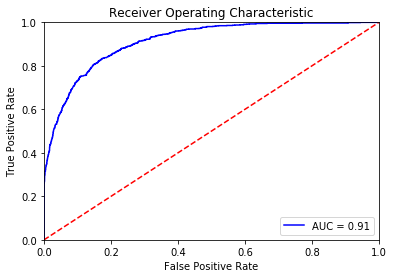

In [147]:
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio = 1, n_jobs = -1)
#features = []
#features.append(('pca', PCA(n_components=2)))
#features.append(('select_best', SelectKBest(k=20)))
#feature_union = FeatureUnion(features)
# Construct pipeline
ada_pipe = Pipeline([('scl', preprocessing.MinMaxScaler()),
                    #('feature_union', feature_union),
                    ('smote_enn', sm),
                    ('clf', AdaBoostClassifier(n_estimators=500))])

ada_boost = ada_pipe.fit(X_train, y_train)

probs = ada_boost.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [148]:
rf_predictions = ada_boost.predict(X_test)
print(accuracy_score(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

0.84075
[[2573  446]
 [ 191  790]]
             precision    recall  f1-score   support

          0       0.93      0.85      0.89      3019
          1       0.64      0.81      0.71       981

avg / total       0.86      0.84      0.85      4000



In [47]:
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio = 1.0, n_jobs = -1)
#features = []
#features.append(('pca', PCA(n_components=2)))
#features.append(('select_best', SelectKBest(k=50)))
#feature_union = FeatureUnion(features)
# Construct pipeline
pipe = Pipeline([('scl', preprocessing.MinMaxScaler()),
                 #('smote_enn', sm),
                 #('pca', PCA(n_components=3)),
                 ('clf', LogisticRegression(random_state=42))])
grid_params = [#{'pca__n_components': [1, 2, 3, 4, None],
                {'clf__penalty': ['l1', 'l2'],
                 'clf__C': [int(x) for x in np.linspace(start = 1, stop = 2, num = 5)]}]
# Construct grid search
lf_grid = GridSearchCV(estimator=pipe,
			param_grid=grid_params,
			scoring='roc_auc',
			cv=10, n_jobs=-1,verbose=2)
# Fit using grid search
lf_grid.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'clf__penalty': ['l1', 'l2'], 'clf__C': [1, 1, 1, 1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [48]:
# Best accuracy
print('Best accuracy: %.3f' % lf_grid.best_score_)
# Best params
print('\nBest params:\n', lf_grid.best_params_)

Best accuracy: 0.906

Best params:
 {'clf__C': 1, 'clf__penalty': 'l1'}


C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

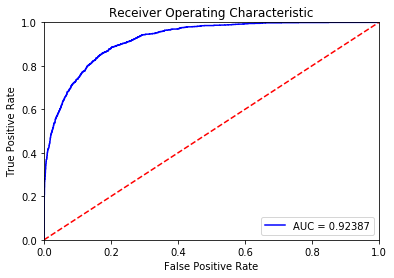

In [148]:
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
#sm = SMOTE(ratio = 1.0, n_jobs = -1)
clf1 = SVC(probability=True)
sm = SMOTE(random_state=42, ratio = 1.0)
#x_train_res, y_train_res = sm.fit_sample(X,y)
clf2 = RandomForestClassifier(bootstrap=False,
                              n_estimators=90,
                              max_depth=25,
                              min_samples_split=45,
                              #class_weight='balanced',
                              min_samples_leaf=2,n_jobs=-1)
clf3 = LogisticRegression(penalty='l1', C=1)
xg_boost= xgb.XGBClassifier(n_estimators=100)
clf6= AdaBoostClassifier(n_estimators=500)
clf7= GradientBoostingClassifier(n_estimators=90,max_depth=25,
                              min_samples_split=45,
                              min_samples_leaf=2)
clf8=KNeighborsClassifier()
ensemble_pipe = Pipeline([('scl', preprocessing.MinMaxScaler()),
                          #('smote_enn', sm),
                          ('ensemble', EnsembleVoteClassifier(clfs=[xg_boost,clf2,clf7,clf8,clf3], weights=[25,2,1,2,1]))])
#ensemble_pipe = Pipeline([('scl', preprocessing.MinMaxScaler()),
#                          #('smote_enn', sm),
#                          ('ensemble', 
#                          StackingClassifier(classifiers=[clf2,clf3,clf7,clf1,clf6],
#                          use_probas=True,
#                          average_probas=False,
#                          meta_classifier=xg_boost))])                       
ensemble_model = ensemble_pipe.fit(X_train,y_train)

probs = ensemble_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
df_2=pd.read_csv(base + "X_test.txt",delimiter=",")
df_2['capital.loss']=df_2['capital.loss']*(-1)

In [108]:
df_X_test = pd.get_dummies(df_2,drop_first=True)

In [58]:
#unique, counts = np.unique(df_2['native.country'], return_counts=True)
#print (np.asarray((unique, counts)).T)

In [109]:
X_test_1=df_X_test.values

In [110]:
scaler = preprocessing.MinMaxScaler()
X_test_1 = scaler.fit_transform(X_test_1)

C:\Users\rimo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [111]:
probs = ensemble_model.predict_proba(X_test_1)
preds = probs[:,1]

In [262]:
#from collections import Counter
#print(Counter(prediction).keys())
#print(Counter(prediction).values())

In [112]:
fh = open('predictions.csv','w') # open file for upload
fh.write('ID,Prob1\n') # output header line
for i,yi in enumerate(preds):
    fh.write('{},{}\n'.format(i,yi)) # output each prediction
fh.close() # close the file